<a href="https://colab.research.google.com/github/sohansputhran/Algorithmic-Redistricting/blob/main/Iowa_BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving IA_counties.csv to IA_counties.csv


{'IA_counties.csv': b"X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD\r\n-92.9990010405311,42.0358010107192,19,127,19127,Marshall,Marshall County,1482770678,1803086,+42.0416910,-092.9814523,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1\r\n-92.0669659987178,42.0802989929437,19,011,19011,Benton,Benton County,1855117342,5760770,+42.0925474,-092.0576300,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,1906

In [3]:
import pandas as pd
df = pd.read_csv('IA_counties.csv')
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD
0,-92.999001,42.035801,19,127,19127,Marshall,Marshall County,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1
1,-92.066966,42.080299,19,11,19011,Benton,Benton County,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,13501,6747,6658,96,13712,7058,6447,207,14023,6862,6940,221,13844,4678,8232,934,1
2,-95.150846,43.082520,19,41,19041,Clay,Clay County,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,8588,3547,4898,143,8398,3925,4355,118,8502,3385,4951,166,8617,2249,5877,491,4
3,-95.325464,41.684636,19,165,19165,Shelby,Shelby County,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,6670,2355,4256,59,6453,2863,3488,102,6483,2469,3911,103,6370,1662,4362,346,4
4,-91.352586,42.862146,19,43,19043,Clayton,Clayton County,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,9168,4736,4312,120,8989,5195,3651,143,9138,4806,4164,168,9129,3237,5317,575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,Lee,Lee County,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,17858,10152,7472,234,17224,9821,7062,341,18911,10714,7785,412,16151,6215,8803,1133,2
95,-93.465211,42.035540,19,169,19169,Story,Story County,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,44652,23296,20819,537,46575,26548,18995,1032,47150,26192,19668,1290,50667,25709,19458,5500,4
96,-92.768104,42.382062,19,75,19075,Grundy,Grundy County,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,6849,2386,4429,34,6828,2790,3945,93,6962,2635,4215,112,6872,1856,4527,489,4
97,-95.550817,41.333039,19,155,19155,Pottawattamie,Pottawattamie County,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,41820,16906,24558,356,42320,20436,21237,647,42301,19644,21860,797,42680,15355,24447,2878,3


In [4]:
df = df.drop(['NAMELSAD10'], axis=1)
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,PRES04D,PRES04R,PRES04OTH,TOTVOT08,PRES08D,PRES08R,PRES08OTH,TOTVOT12,PRES12D,PRES12R,PRES12OTH,TOTVOT16,PRES16D,PRES16R,PRES16OTH,CD
0,-92.999001,42.035801,19,127,19127,Marshall,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,9443,9557,164,18657,10023,8278,356,19064,10257,8472,335,17980,7652,9146,1182,1
1,-92.066966,42.080299,19,11,19011,Benton,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,13501,6747,6658,96,13712,7058,6447,207,14023,6862,6940,221,13844,4678,8232,934,1
2,-95.150846,43.082520,19,41,19041,Clay,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,8588,3547,4898,143,8398,3925,4355,118,8502,3385,4951,166,8617,2249,5877,491,4
3,-95.325464,41.684636,19,165,19165,Shelby,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,6670,2355,4256,59,6453,2863,3488,102,6483,2469,3911,103,6370,1662,4362,346,4
4,-91.352586,42.862146,19,43,19043,Clayton,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,9168,4736,4312,120,8989,5195,3651,143,9138,4806,4164,168,9129,3237,5317,575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,Lee,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,17858,10152,7472,234,17224,9821,7062,341,18911,10714,7785,412,16151,6215,8803,1133,2
95,-93.465211,42.035540,19,169,19169,Story,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,44652,23296,20819,537,46575,26548,18995,1032,47150,26192,19668,1290,50667,25709,19458,5500,4
96,-92.768104,42.382062,19,75,19075,Grundy,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,6849,2386,4429,34,6828,2790,3945,93,6962,2635,4215,112,6872,1856,4527,489,4
97,-95.550817,41.333039,19,155,19155,Pottawattamie,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,41820,16906,24558,356,42320,20436,21237,647,42301,19644,21860,797,42680,15355,24447,2878,3


In [5]:
df = pd.concat([df,pd.get_dummies(df['NAME10'], prefix='county')],axis=1)
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,...,county_Lyon,county_Madison,county_Mahaska,county_Marion,county_Marshall,county_Mills,county_Mitchell,county_Monona,county_Monroe,county_Montgomery,county_Muscatine,county_O'Brien,county_Osceola,county_Page,county_Palo Alto,county_Plymouth,county_Pocahontas,county_Polk,county_Pottawattamie,county_Poweshiek,county_Ringgold,county_Sac,county_Scott,county_Shelby,county_Sioux,county_Story,county_Tama,county_Taylor,county_Union,county_Van Buren,county_Wapello,county_Warren,county_Washington,county_Wayne,county_Webster,county_Winnebago,county_Winneshiek,county_Woodbury,county_Worth,county_Wright
0,-92.999001,42.035801,19,127,19127,Marshall,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-92.066966,42.080299,19,11,19011,Benton,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-95.150846,43.082520,19,41,19041,Clay,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-95.325464,41.684636,19,165,19165,Shelby,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-91.352586,42.862146,19,43,19043,Clayton,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,Lee,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,-93.465211,42.035540,19,169,19169,Story,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,-92.768104,42.382062,19,75,19075,Grundy,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,-95.550817,41.333039,19,155,19155,Pottawattamie,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.drop(['NAME10'], axis=1)
df

,X,Y,STATEFP10,COUNTYFP10,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,N_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,TOTVOT00,PRES00D,PRES00R,PRES00G,PRES00OTH,TOTVOT04,...,county_Lyon,county_Madison,county_Mahaska,county_Marion,county_Marshall,county_Mills,county_Mitchell,county_Monona,county_Monroe,county_Montgomery,county_Muscatine,county_O'Brien,county_Osceola,county_Page,county_Palo Alto,county_Plymouth,county_Pocahontas,county_Polk,county_Pottawattamie,county_Poweshiek,county_Ringgold,county_Sac,county_Scott,county_Shelby,county_Sioux,county_Story,county_Tama,county_Taylor,county_Union,county_Van Buren,county_Wapello,county_Warren,county_Washington,county_Wayne,county_Webster,county_Winnebago,county_Winneshiek,county_Woodbury,county_Worth,county_Wright
0,-92.999001,42.035801,19,127,19127,1482770678,1803086,42.041691,-92.981452,40648,31807,629,104,526,39,33,493,7017,4264,50,82,10,11,2263,337,30344,3762,25417,421,67,406,26,20,225,17624,8322,8785,340,177,19164,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-92.066966,42.080299,19,11,19011,1855117342,5760770,42.092547,-92.057630,26076,25387,93,41,66,2,5,207,275,182,9,4,0,0,48,32,19430,155,19068,49,34,46,2,4,72,11766,5915,5468,231,152,13501,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-95.150846,43.082520,19,41,19041,1469139214,13866941,43.079822,-95.149726,16667,15843,68,36,98,0,1,144,477,234,1,2,1,1,195,43,12837,265,12386,39,25,67,0,0,55,7578,3294,3992,166,126,8588,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-95.325464,41.684636,19,165,19165,1530110414,1486135,41.679014,-95.308917,12167,11763,31,24,46,0,7,77,219,146,1,4,0,2,61,5,9301,133,9056,19,16,26,0,5,46,6009,2179,3655,113,62,6670,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-91.352586,42.862146,19,43,19043,2016405612,36586071,42.840998,-91.323511,18129,17563,60,13,42,17,2,126,306,168,1,7,0,0,108,22,13925,163,13610,28,12,27,15,0,70,8571,4238,4034,206,93,9168,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-91.538382,40.594834,19,111,19111,1340366450,55293745,40.647588,-91.477157,35862,32833,1094,61,181,7,11,583,1092,704,24,7,2,4,240,111,27901,686,25897,860,54,139,6,6,253,16572,9632,6339,325,276,17858,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,-93.465211,42.035540,19,169,19169,1483592867,2152172,42.037538,-93.466093,89542,77812,2125,134,5369,17,112,1278,2695,1532,71,29,14,3,806,240,73589,1912,64617,1493,95,4647,15,59,751,35364,17478,16228,1317,341,44652,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,-92.768104,42.382062,19,75,19075,1299805924,94406,42.403323,-92.790261,12453,12190,26,4,27,7,1,76,122,79,2,0,0,0,30,11,9488,50,9382,10,2,14,1,0,29,6111,2139,3851,70,51,6849,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,-95.550817,41.333039,19,155,19155,2147483647,22925740,41.340184,-95.544905,93158,83609,1216,334,549,25,36,1238,6151,2949,51,107,21,2,2489,532,70679,3559,64968,848,251,411,21,23,598,34467,14726,18783,690,268,41820,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.columns

Index(['X', 'Y', 'STATEFP10', 'COUNTYFP10', 'GEOID10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'TOTPOP',
       ...
       'county_Wapello', 'county_Warren', 'county_Washington', 'county_Wayne',
       'county_Webster', 'county_Winnebago', 'county_Winneshiek',
       'county_Woodbury', 'county_Worth', 'county_Wright'],
      dtype='object', length=155)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


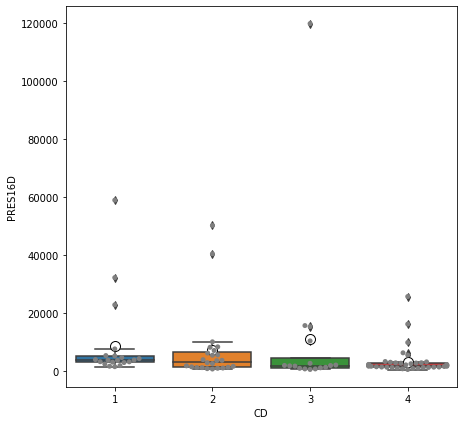

In [23]:
x = "CD"
y = "PRES16D"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

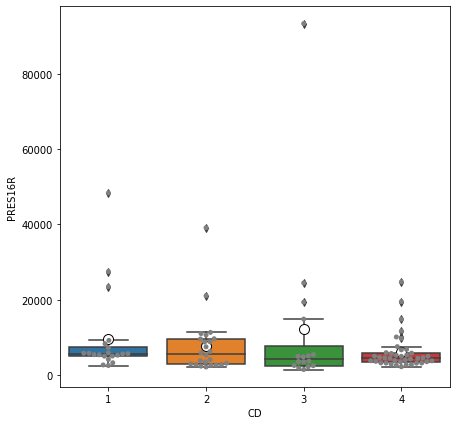

In [24]:
x = "CD"
y = "PRES16R"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


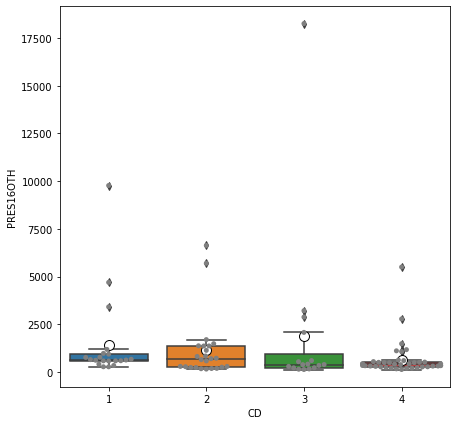

In [26]:
x = "CD"
y = "PRES16OTH"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


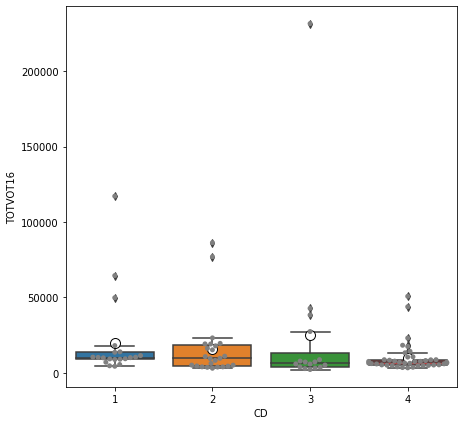

In [28]:
x = "CD"
y = "TOTVOT16"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x = x, y = y, data = df, showmeans = True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.swarmplot(x = x, y = y, data = df, color = "grey")
plt.show()

In [ ]:
df["Column"].mean()